In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

import warnings
warnings.filterwarnings("ignore")

/home/imachuca/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [44]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
realf = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')
real = realf['Bathymetry'][:]
coordsf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc')
maskfi = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/1_mesh_mask.nc')
maskfr = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/real_base/1_mesh_mask.nc')

**What (u,v,f,t) is at the edges??**

In [45]:
e1i_mean = np.mean(maskfi['e1t'][0, :, :], axis=0)
e1r_mean = np.mean(maskfr['e1t'][0, :, :], axis=0)

dist_xi = np.cumsum(e1i_mean) 
dist_xr = np.cumsum(e1r_mean) 

e2i_mean = np.mean(maskfi['e2t'][0, :, :], axis=1)
e2r_mean = np.mean(maskfr['e2t'][0, :, :], axis=1)

dist_yi = np.cumsum(e2i_mean) 
dist_yr = np.cumsum(e2r_mean) 

In [22]:
maski = maskfi['tmask'][0, 0, :, :]
maskr = maskfr['tmask'][0, 0, :, :]

ideal_masked = np.ma.array(ideal, mask=1 - maski)
real_masked = np.ma.array(real, mask=1 - maskr)

In [23]:
# http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=6
colour_list = ['#f7fcf0','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']#'#e0f3db'(2nd)
cmap = LinearSegmentedColormap.from_list('mycmap', colour_list, N=500, gamma=1)

# contour lines
levels = [40.5, 80, 220, 500, 1200]
clocxr, clocxi = 90, 100
clocr=[(clocxr, 100), (clocxr, 220), (clocxr, 230), (clocxr, 250), (clocxr, 260)]
cloci=[(clocxi, 50), (clocxi+80, 140), (clocxi+40, 145), (clocxi, 150), (clocxi, 200)]

# AGRIF
inds_i = [90, 180, 10, 90]
inds_r = [130, 220, 10, 90]

In [46]:
maskfi

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: 1_mesh_mask.nc
    TimeStamp: 17/04/2018 16:19:02 -0700
    dimensions(sizes): x(274), y(244), z(80), t(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 nav_lev(z), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int8 vmaskutil(t,y,x), int8 fmaskutil(t,y,x), float32 glamt(t,y,x), float32 glamu(t,y,x), float32 glamv(t,y,x), float32 glamf(t,y,x), float32 gphit(t,y,x), float32 gphiu(t,y,x), float32 gphiv(t,y,x), float32 gphif(t,y,x), float64 e1t(t,y,x), float64 e1u(t,y,x), float64 e1v(t,y,x), float64 e1f(t,y,x), float64 e2t(t,y,x), float64 e2u(t,y,x), float64 e2v(t,y,x), float64 e2f(t,y,x), float64 ff(t,y,x), int16 mbathy(t,y,x), int16 misf(t,y,x), float32 isfdraft(t,y,x), float64 e3t_0(t,z,y,x), float64 e3u_0(t,z,y,x), float64 e3v_0(t,z,y,x), float64 

In [47]:
maskfr

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: 1_mesh_mask.nc
    TimeStamp: 17/04/2018 16:54:01 -0700
    dimensions(sizes): x(274), y(244), z(80), t(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 nav_lev(z), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int8 vmaskutil(t,y,x), int8 fmaskutil(t,y,x), float32 glamt(t,y,x), float32 glamu(t,y,x), float32 glamv(t,y,x), float32 glamf(t,y,x), float32 gphit(t,y,x), float32 gphiu(t,y,x), float32 gphiv(t,y,x), float32 gphif(t,y,x), float64 e1t(t,y,x), float64 e1u(t,y,x), float64 e1v(t,y,x), float64 e1f(t,y,x), float64 e2t(t,y,x), float64 e2u(t,y,x), float64 e2v(t,y,x), float64 e2f(t,y,x), float64 ff(t,y,x), int16 mbathy(t,y,x), int16 misf(t,y,x), float32 isfdraft(t,y,x), float64 e3t_0(t,z,y,x), float64 e3u_0(t,z,y,x), float64 e3v_0(t,z,y,x), float64 

In [48]:
for dist, name in zip([dist_xr, dist_xi, dist_yr, dist_yi], ['xr', 'xi', 'yr', 'yi']):
    print(name)
    print(dist[-1]/1000)

xr
206.66390237973954
xi
206.66404570003365
yr
183.75077956122348
yi
183.75078019542124


In [49]:
for e, name in zip([e1i_mean, e1r_mean, e2i_mean, e2r_mean], ['1i', '1r', '2i', '2r']):
    print(name)
    print(np.mean(e)/1000)

1i
0.7542483419709256
1r
0.7542478189041587
2i
0.7530769680140214
2r
0.7530769654148511


In [71]:
for i in range(80):
    e3 = maskfi['e3t_0'][0, :, 0, 0]
    e3sum = np.cumsum(e3)
    gdep = maskfi['gdept_1d'][0, :]
    print('ind', i+1, ', e3', np.round(e3[i],2), ', gdep', np.round(gdep[i],2))

ind 1 , e3 8.75 , gdep 4.38
ind 2 , e3 8.75 , gdep 13.13
ind 3 , e3 8.75 , gdep 21.88
ind 4 , e3 8.75 , gdep 30.62
ind 5 , e3 8.75 , gdep 39.38
ind 6 , e3 8.75 , gdep 48.12
ind 7 , e3 8.75 , gdep 56.88
ind 8 , e3 8.75 , gdep 65.62
ind 9 , e3 8.75 , gdep 74.38
ind 10 , e3 8.75 , gdep 83.13
ind 11 , e3 8.75 , gdep 91.88
ind 12 , e3 8.75 , gdep 100.63
ind 13 , e3 8.75 , gdep 109.38
ind 14 , e3 8.75 , gdep 118.13
ind 15 , e3 8.75 , gdep 126.88
ind 16 , e3 8.75 , gdep 135.62
ind 17 , e3 8.75 , gdep 144.38
ind 18 , e3 8.75 , gdep 153.12
ind 19 , e3 8.75 , gdep 161.88
ind 20 , e3 8.75 , gdep 170.62
ind 21 , e3 8.75 , gdep 179.38
ind 22 , e3 8.75 , gdep 188.12
ind 23 , e3 8.75 , gdep 196.88
ind 24 , e3 8.75 , gdep 205.62
ind 25 , e3 8.75 , gdep 214.38
ind 26 , e3 8.75 , gdep 223.13
ind 27 , e3 8.75 , gdep 231.88
ind 28 , e3 8.75 , gdep 240.62
ind 29 , e3 8.75 , gdep 249.38
ind 30 , e3 8.75 , gdep 258.12
ind 31 , e3 8.75 , gdep 266.88
ind 32 , e3 8.75 , gdep 275.62
ind 33 , e3 8.75 , gdep 284.3

# Figures

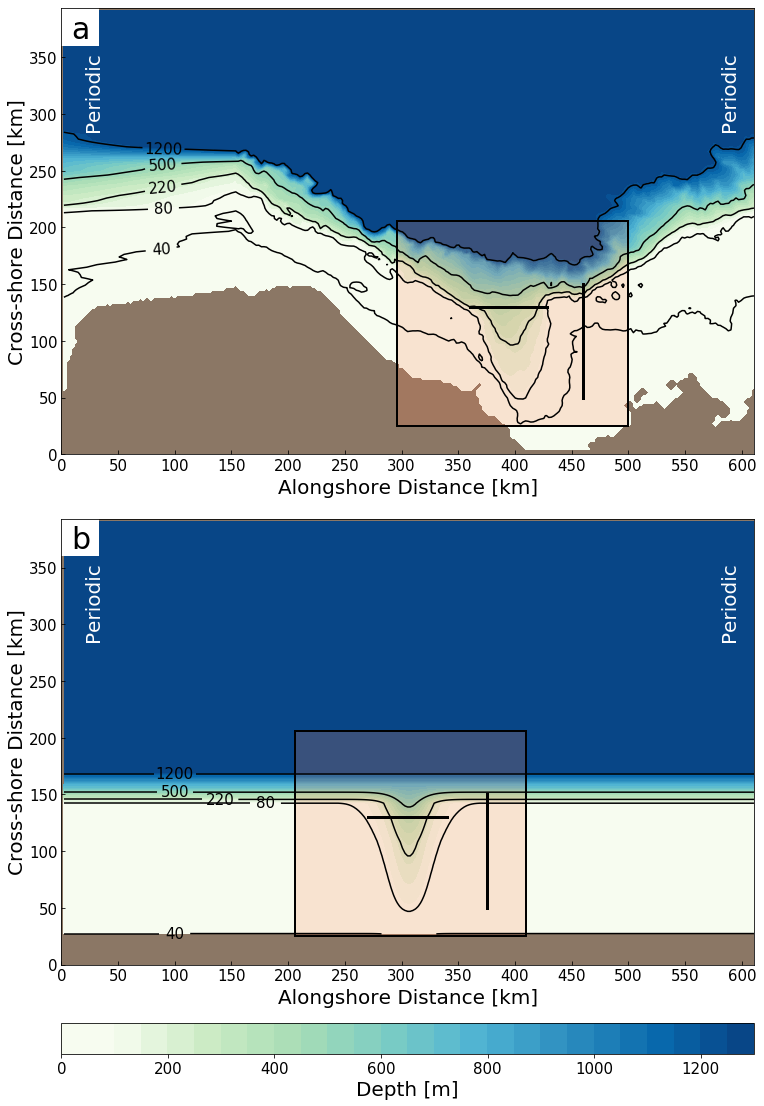

In [15]:
fig, (ax1, ax2, cax) = plt.subplots(3,1,figsize=(20, 15), gridspec_kw={"height_ratios":[1,1, 0.08]})

axs = [ax1, ax2]
bathys = [real_masked, ideal_masked]
dist_xs = [dist_xr, dist_xi]
dist_ys = [dist_yr, dist_yi]
clocs = [clocr, cloci]
labs = ['a', 'b']

for ax, bathy, dist_x, dist_y, cloc, lab in zip(axs, bathys, dist_xs, dist_ys, clocs, labs):
    dist_x_km, dist_y_km = dist_x/1000, dist_y/1000
    
    ax.patch.set_color('#8b7765')
    p = ax.contourf(dist_x_km, dist_y_km, bathy, cmap=cmap, vmin=100, vmax=1300, levels=np.arange(0, 1350, 50))
    c = ax.contour(dist_x_km, dist_y_km, bathy, levels=levels, colors='k', linewidth=2.3)
    plt.clabel(c, inline=1, fontsize=15, fmt='%1.f', manual=cloc, inline_spacing=16)
    
    lw=3
    if ax == ax1:
        x, y1, y2 = 460, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k')
        y, x1, x2 = 130, 360, 428
        ax.plot([x1, x2], [y, y], lw=lw, c='k')
    if ax == ax2:
        x, y1, y2 =375, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k')
        y, x1, x2 = 130, 270, 340
        ax.plot([x1, x2], [y, y], lw=lw, c='k')
    
    ax.set_xlim([0, dist_x_km[-1]])
    ax.set_ylim([0, dist_y_km[-1]])
    ax.xaxis.set_ticks(np.arange(0, 650, 50))
    ax.yaxis.set_ticks(np.arange(0, 400, 50))
    ax.tick_params(direction='in', length=4, color='k', labelsize=15)
    ax.set_aspect(aspect='equal')
    ax.set_xlabel('Alongshore Distance [km]', fontsize=20, labelpad=5)
    ax.set_ylabel('Cross-shore Distance [km]', fontsize=20, labelpad=3)
    ax.annotate(lab, xy=(9, 367), fontsize=30)
    ax.add_patch(patches.Rectangle((0, 360),(dist_y_km[-1]-360),(dist_y_km[-1]-360), facecolor='w', alpha=1))
    ax.text(20, 320, 'Periodic', rotation='vertical', fontsize=20, color='w', va='center')
    ax.text((dist_x_km[-1]-30), 320, 'Periodic', rotation='vertical', fontsize=20, color='w', va='center')

    #ax.grid(color='w')
    #ax.minorticks_on()
    #ax.grid(b=True, which='minor', color='gray', linestyle='-')
              
# AGRIF
for ax, inds in zip([ax1, ax2], [inds_r, inds_i]):     
    imin, imax, jmin, jmax = dist_x_km[inds[0]], dist_x_km[inds[1]], dist_y_km[inds[2]], dist_y_km[inds[3]]
    ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), facecolor='coral', alpha=0.2))
    ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), fill=None, edgecolor='k', linewidth=2.0)) 

# colorbar
ip = InsetPosition(ax2, [0, -0.2, 1, 0.07]) 
cax.set_axes_locator(ip)
cbar = fig.colorbar(p, cax=cax, ticks=np.arange(50, 1300, 150), orientation='horizontal')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Depth [m]', fontsize=20)
cbar.set_ticks(np.arange(0, 1500, 200))
    
# overall
fig.tight_layout(h_pad=2)
fig.savefig('./bathymetry_dimensions.png', dpi=100, bbox_inches='tight')

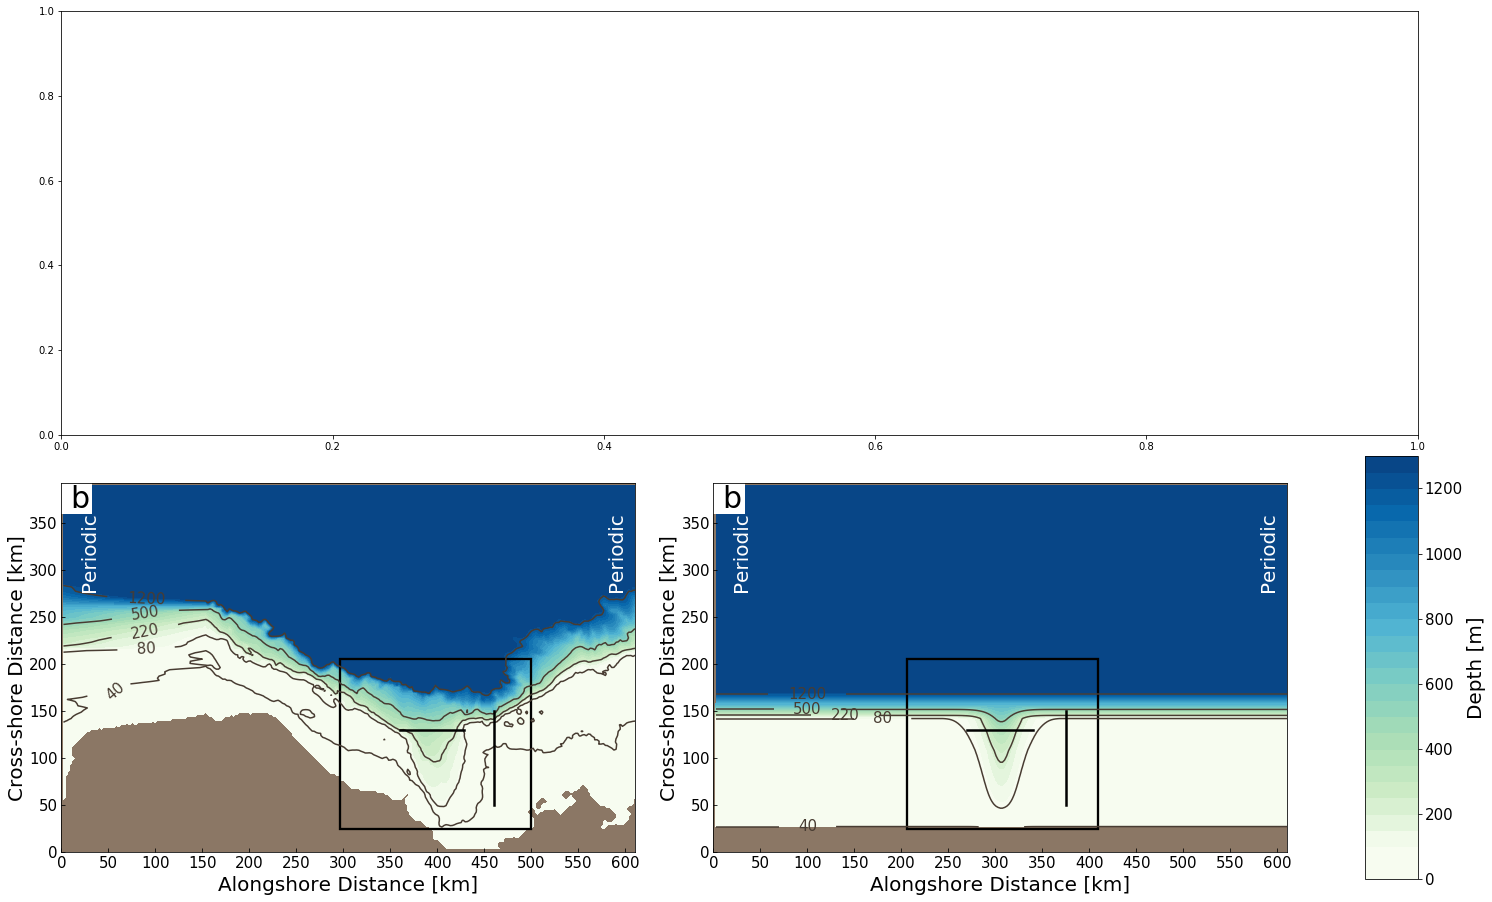

In [36]:
fig = plt.figure(figsize=(20, 13))
gs = gridspec.GridSpec(2, 11)
ax0 = plt.subplot(gs[:-1, :])
ax1 = plt.subplot(gs[-1, :5])
ax2 = plt.subplot(gs[-1, 5:10])
cax = plt.subplot(gs[-1, 10:11])

axs = [ax1, ax2]
bathys = [real_masked, ideal_masked]
dist_xs = [dist_xr, dist_xi]
dist_ys = [dist_yr, dist_yi]
masks = [maskr, maski]
clocs = [clocr, cloci]
labs = ['b', 'b']

for ax, bathy, dist_x, dist_y, mask, cloc, lab in zip(axs, bathys, dist_xs, dist_ys, masks, clocs, labs):
    dist_x_km, dist_y_km = dist_x/1000, dist_y/1000
    
    ax.patch.set_color('#8b7765')
    p = ax.contourf(dist_x_km, dist_y_km, bathy, cmap=cmap, vmin=100, vmax=1300, levels=np.arange(0, 1350, 50))
    c = ax.contour(dist_x_km, dist_y_km, bathy, levels=levels, colors='#483C32', linewidth=2.3)
    plt.clabel(c, inline=1, fontsize=15, fmt='%1.f', manual=cloc, inline_spacing=16)
    
    lw=2.5
    if ax == ax1:
        x, y1, y2 = 460, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k')
        y, x1, x2 = 130, 360, 428
        ax.plot([x1, x2], [y, y], lw=lw, c='k')
    if ax == ax2:
        x, y1, y2 =375, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k')
        y, x1, x2 = 130, 270, 340
        ax.plot([x1, x2], [y, y], lw=lw, c='k')
    
    ax.set_xlim([0, dist_x_km[-1]])
    ax.set_ylim([0, dist_y_km[-1]])
    ax.xaxis.set_ticks(np.arange(0, 650, 50))
    ax.yaxis.set_ticks(np.arange(0, 400, 50))
    ax.tick_params(direction='in', length=4, color='k', labelsize=15)
    ax.set_aspect(aspect='equal')
    ax.set_xlabel('Alongshore Distance [km]', fontsize=20, labelpad=5)
    ax.set_ylabel('Cross-shore Distance [km]', fontsize=20, labelpad=3)
    ax.annotate(lab, xy=(9, 367), fontsize=30)
    ax.add_patch(patches.Rectangle((0, 360),(dist_y_km[-1]-360),(dist_y_km[-1]-360), facecolor='w', alpha=1))
    ax.text(20, 320, 'Periodic', rotation='vertical', fontsize=20, color='w', va='center')
    ax.text((dist_x_km[-1]-30), 320, 'Periodic', rotation='vertical', fontsize=20, color='w', va='center')

    #ax.grid(color='w')
    #ax.minorticks_on()
    #ax.grid(b=True, which='minor', color='gray', linestyle='-')
              
# AGRIF
for ax, inds in zip([ax1, ax2], [inds_r, inds_i]):     
    imin, imax, jmin, jmax = dist_x_km[inds[0]], dist_x_km[inds[1]], dist_y_km[inds[2]], dist_y_km[inds[3]]
    #ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), facecolor='coral', alpha=0.2))
    ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), fill=None, edgecolor='k', linewidth=2.3)) 

# colorbar
ip = InsetPosition(cax, [0, 0, 1, 1]) 
cax.set_axes_locator(ip)
cbar = fig.colorbar(p, cax=cax, ticks=np.arange(50, 1300, 150), orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Depth [m]', fontsize=20)
cbar.set_ticks(np.arange(0, 1500, 200))
    
# overall
gs.tight_layout(fig)
gs.update(wspace=1.5, hspace=0.05)
fig.savefig('./bathymetry_dimensions.png', dpi=100, bbox_inches='tight')